## Question  2
### Average Credit Vs Cash Analysis Per Borough

In [1]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
extracted_files = glob.glob('..\\Data\\*\\*\\processed\\*.csv')
df = pd.DataFrame()
list_ = []
for fileName in extracted_files:
    short_df = pd.read_csv(fileName)
    list_.append(short_df)
df = pd.concat(list_)

In [3]:
df.head()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,travel_date,pickup_area,dropoff_area
0,0,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.2,-73.979424,40.744614,1,N,...,9.0,0.5,0.5,0.00,0.0,0.3,10.30,2016-01-01,Manhattan,Manhattan
1,1,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.0,-73.947151,40.791046,1,N,...,18.0,0.5,0.5,0.00,0.0,0.3,19.30,2016-01-01,Manhattan,Manhattan
2,2,1,2016-01-01 00:00:04,2016-01-01 00:14:32,1,3.7,-74.004303,40.742241,1,N,...,14.0,0.5,0.5,3.05,0.0,0.3,18.35,2016-01-01,Manhattan,Manhattan
3,3,1,2016-01-01 00:00:05,2016-01-01 00:14:27,2,2.2,-73.991997,40.718578,1,N,...,11.0,0.5,0.5,1.50,0.0,0.3,13.80,2016-01-01,Manhattan,Manhattan
4,4,1,2016-01-01 00:00:06,2016-01-01 00:04:44,1,1.7,-73.982101,40.774696,1,Y,...,7.0,0.5,0.5,1.65,0.0,0.3,9.95,2016-01-01,Manhattan,Manhattan


In [4]:
group_by_series = df['total_amount'].groupby([df['pickup_area'], df['payment_type']]).mean()
group_by_df = group_by_series.to_frame()
group_by_df = group_by_df.reset_index()
#Filter Cash and Credit payments
group_by_df = group_by_df[group_by_df['payment_type'].isin([1,2])]
group_by_df['payment_type'] = group_by_df['payment_type'].apply(lambda x: 'Credit' if x == 1 else 'Cash')
group_by_df = group_by_df.rename(columns = {'pickup_area':'Pick-Up Area', 'payment_type':'Payment Type', 'total_amount':'Average'})

In [5]:
group_by_df

,Pick-Up Area,Payment Type,Average
0,Bronx,Credit,23.690989
1,Bronx,Cash,14.646806
4,Brooklyn,Credit,20.422048
5,Brooklyn,Cash,14.285871
8,Manhattan,Credit,15.454543
9,Manhattan,Cash,12.366398
12,Not Specified,Credit,20.868621
13,Not Specified,Cash,14.555630
16,Queens,Credit,41.024828
17,Queens,Cash,25.786615


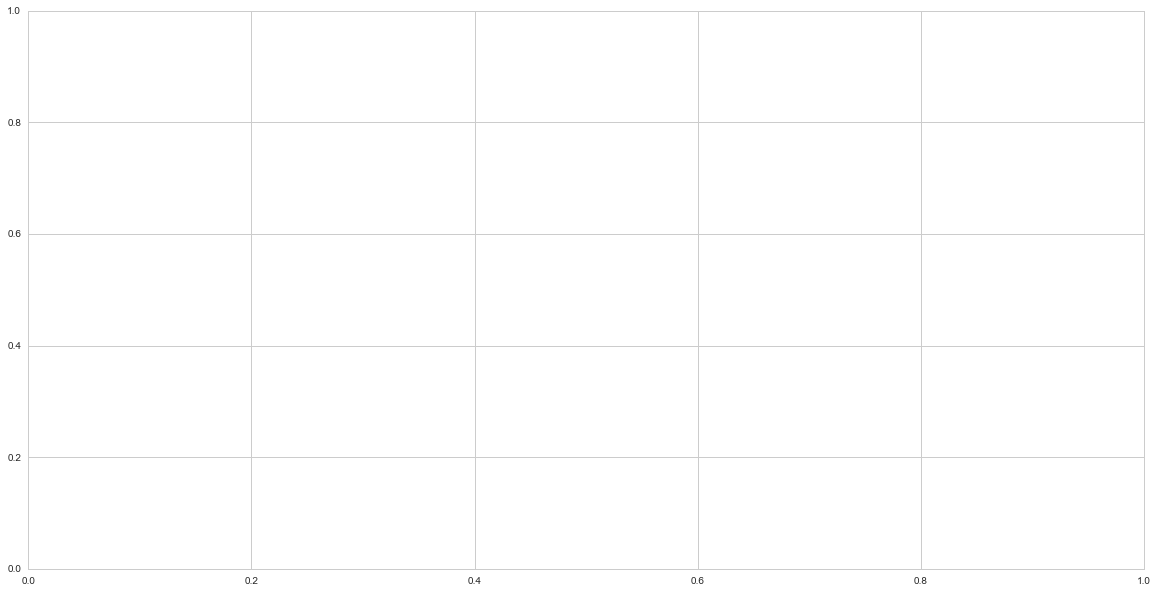

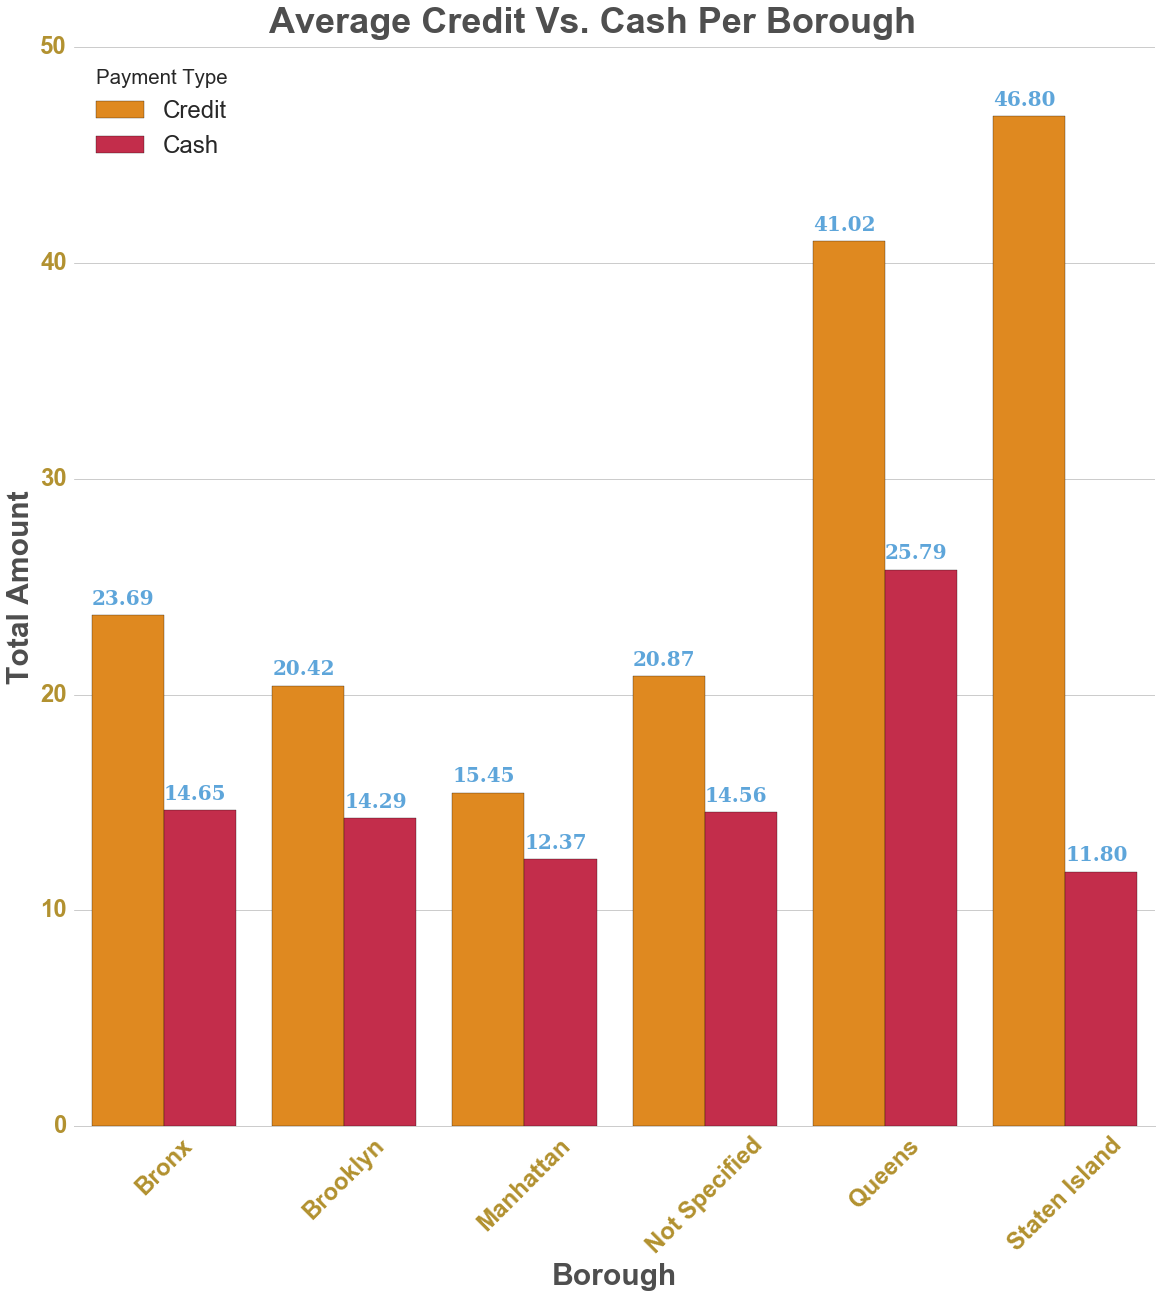

In [58]:
myColors = ["#FF8C00","#DC143C"]
rc={'axes.labelsize': 24, 'legend.fontsize': 24.0}
sns.set(rc=rc, style='whitegrid')
factor_plot = sns.factorplot(x="Pick-Up Area", y="Average", hue="Payment Type",
                             data=group_by_df, kind = 'bar' , size = 16, palette=myColors,
                             legend=True, legend_out=False)
factor_plot.despine(left=True)

#Title
figure_title = factor_plot.fig.suptitle('Average Credit Vs. Cash Per Borough')
figure_title.set_position([.5, 1.02])
figure_title.set_color(color='#4D4D4D')
figure_title.set_fontweight(weight='bold')
figure_title.set_fontsize(36)

#XYLabels
factor_plot.ax.xaxis.set_label_text('Borough', weight='bold')
factor_plot.ax.xaxis.get_label().set_fontsize(30)
factor_plot.ax.xaxis.get_label().set_color('#4D4D4D')

factor_plot.ax.yaxis.set_label_text('Total Amount', weight='bold')
factor_plot.ax.yaxis.get_label().set_fontsize(30)
factor_plot.ax.yaxis.get_label().set_color('#4D4D4D')

#XTick
factor_plot.set_xticklabels(rotation=45, fontsize=24, color='#B2912F',fontweight='bold')
factor_plot.set_yticklabels(fontsize=24, color='#B2912F',fontweight='bold')

#Annotations
font ={'family': 'serif','weight': 'bold','size': 20, 'color':'#5DA5DA'}
for p in factor_plot.ax.patches:
    percentage = p.get_height()
    factor_plot.ax.text(p.get_x(), percentage+0.5, '%1.2f'%(percentage), fontdict= font)